In [1]:
from env import *
from fonctions import *
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import time

Ce fichier contient les essais numeriques de resolution en utilisant la methode iteration par valeur. On va etudier les impacts posees par la taille de grille, la probabilite du mouvement, le facteur d'actualisation sur le temps de resolution. Les differents paramatres utilises sont les suivants:  

taille de grille: (10,10), (10,15), (15,20)  
probabilite de mouvement: p={1,0.6}  
facteur d'actualisation: $\gamma$={0.9,0.7,0.5}

### temps moyens - taille

In [2]:
proba = [1,0.6]
taille = [(10,10),(10,15),(15,20)]
tmps_ites = np.zeros((len(proba),len(taille),2))
N = 15
gamma = 0.9

In [3]:
for i in range(len(proba)):
    for j in range(len(taille)):
        p = proba[i]
        t = taille[j]
        t_moyen = 0
        ite_moyen = 0
        
        nblig,nbcol = taille[j]
        env = Env(nblig,nbcol,p,0.2,[0.1,0.2,0.3,0.4])
        
        for n in range(N):
            cases=env.reset()
            time_start = time.time()
            nb_ite,value,policy = value_iteration(env,gamma,max_iteration=2000)
            time_end = time.time()
            ite_moyen += nb_ite
            t_moyen += time_end-time_start
        tmps_ites[i,j,0] = t_moyen/N
        tmps_ites[i,j,1] = ite_moyen/N 

In [4]:
tmps_ites

array([[[ 0.41886994, 22.2       ],
        [ 0.8014641 , 24.06666667],
        [ 2.36866681, 36.2       ]],

       [[ 0.48627828, 33.4       ],
        [ 1.03895709, 35.8       ],
        [ 3.13068911, 45.06666667]]])

In [5]:
y1_t = tmps_ites[0,:,0]
y2_t= tmps_ites[1,:,0]

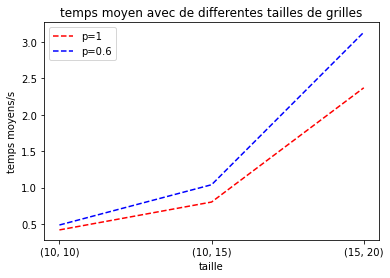

In [6]:
x = range(len(taille))
l1=plt.plot(x,y1_t,'r--',label="p=1")
l2=plt.plot(x,y2_t,'b--',label="p=0.6")
plt.xticks(x,taille)
plt.title("temps moyen avec de differentes tailles de grilles")
plt.xlabel("taille")
plt.ylabel("temps moyens/s")
plt.legend()
plt.show()

### nb d'iteration moyennes - taille

In [7]:
y1_i = tmps_ites[0,:,1]
y2_i= tmps_ites[1,:,1]

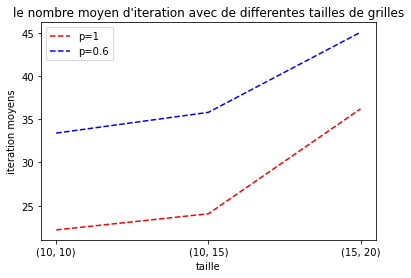

In [8]:
x = range(len(taille))
l1=plt.plot(x,y1_i,'r--',label="p=1")
l2=plt.plot(x,y2_i,'b--',label="p=0.6")
plt.xticks(x,taille)
plt.title("le nombre moyen d'iteration avec de differentes tailles de grilles")
plt.xlabel("taille")
plt.ylabel("iteration moyens")
plt.legend()
plt.show()

### temps moyens - $\gamma$

In [9]:
g = [0.5,0.7,0.9]
nblig = 10
nbcol = 15
p = 0.6

In [10]:
tmps_ites_gamma = np.zeros((len(g),2))

In [11]:
env = Env(nblig,nbcol,p,0.2,[0.1,0.2,0.3,0.4])

for n in range(N):
    cases = env.reset()
    for i in range(len(g)):
        t_moyen = 0
        time_start = time.time()
        nb_ite,value,policy = value_iteration(env,g[i],max_iteration=2000)
        time_end = time.time()
        t_moyen += time_end-time_start
        tmps_ites_gamma[i,0]+=t_moyen
        tmps_ites_gamma[i,1]+=nb_ite
        
tmps_ites_gamma = tmps_ites_gamma/N

In [12]:
tmps_ites_gamma

array([[ 0.54130952, 17.2       ],
       [ 0.83403365, 26.93333333],
       [ 1.05591615, 36.13333333]])

In [13]:
y_1 = tmps_ites_gamma[:,0]
y_2 = tmps_ites_gamma[:,1]

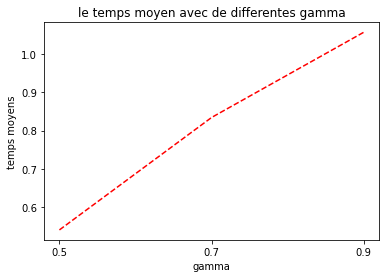

In [14]:
l1=plt.plot(g,y_1,'r--')
plt.xticks(g)
plt.title("le temps moyen avec de differentes gamma")
plt.xlabel("gamma")
plt.ylabel("temps moyens")
plt.show()

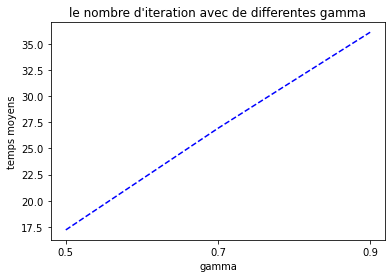

In [15]:
l2=plt.plot(g,y_2,'b--')
plt.xticks(g)
plt.title("le nombre d'iteration avec de differentes gamma")
plt.xlabel("gamma")
plt.ylabel("temps moyens")
plt.show()